## Introdução
Voltando aos dados de atributos do processo de fabricação de roupas e da produtividade dos funcionários, que podem ser usados para fins de classificação, transformando a faixa de produtividade (0-1) em diferentes classes.

Informação das variáveis:
* 1 data: Data em MM-DD-AAAA

* 2 dias: dia da semana

* 3 trimestre: uma parte do mês. Um mês foi dividido em quatro trimestres

* 4 Departamento: Departamento associado à instância

* 5 nº da equipe: número da equipe associada à instância

* 6 n° de Trabalhadores: Número de trabalhadores em cada equipe

* 7 n° de mudanças: Número de mudanças no estilo de um determinado produto

* 8 produtividade alvo: produtividade alvo definida pela Autoridade para cada equipa em cada dia.

* 9 smv: Valor padrão por minuto, é o tempo alocado para uma tarefa

* 10 wip: Trabalho em andamento. Inclui o número de itens não acabados para produtos

* 11 horas extras: Representa a quantidade de horas extras de cada equipe em minutos

* 12 incentivo: Representa a quantidade de incentivo financeiro (no BDT) que permite ou motiva um determinado curso de ação.

* 13 interrupção: A quantidade de tempo em que a produção foi interrompida devido a vários motivos

* 14 ociosos: O número de trabalhadores que ficaram ociosos devido à interrupção da produção

* 15 produtividade atual: a real de produtividade que foi entregue pelos trabalhadores. Ele varia de 0-1.

O primeiro passo é explorar os dados para entender a estrutura e relações entre eles.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline

In [2]:
columns = {"date":"data","quarter":"trimestre","department":"departamento","day":"dias", "team":"nº da equipe",
           "targeted_productivity":"produtividade alvo","smv":"smv", "wip":"wip", "over_time":"horas extras",
           "incentive":"incentivo","idle_time":"interrupção", "idle_men":"ociosos",
           "no_of_style_change":"n° de mudanças", "no_of_workers":"n°de trabalhadores",
           "actual_productivity": "produtividade atual"}
df = pd.read_csv('./data/garments_worker_productivity.csv', parse_dates=True, squeeze=True)
df.rename(columns=columns, inplace=True)
df.set_index('data', inplace=True)
df.head()

,trimestre,departamento,dias,nº da equipe,produtividade alvo,smv,wip,horas extras,incentivo,interrupção,ociosos,n° de mudanças,n°de trabalhadores,produtividade atual
data,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Informações dos dados

In [3]:
from dataAnalisis_Util import data_info

data_info.df_information(df)

,valor
Num. de Observações,1197
Num. de Variáveis,14
Num. Váriáveis numéricas,11
Num. Variáveis de fator,0
Num. Variáveis categoricas,3
Num. Variáveis lógicas,0
Num. Variáveis de data,0
Num. Variáveis com variância zero (uniforme),0
% de variáveis com valores missing = 0%,92
% de variáveis com valores missing <= 50%,100


In [4]:
data_info.num_sumary(df)

outlier > 75% +.5IQR e < 25% -1.5IQR


,Valores negativos,Valores positivos,Valores iguais a zero,Valores únicos,Valores negativo infinito,Valores positivo infinito,Valores missing,Outliers
nº da equipe,0,1197,0,12,0,0,0,0
produtividade alvo,0,1197,0,9,0,0,0,79
smv,0,1197,0,70,0,0,0,0
wip,0,691,0,549,0,0,506,22
horas extras,0,1166,31,143,0,0,0,1
incentivo,0,593,604,48,0,0,0,11
interrupção,0,18,1179,12,0,0,0,18
ociosos,0,18,1179,10,0,0,0,18
n° de mudanças,0,147,1050,3,0,0,0,147
n°de trabalhadores,0,1197,0,61,0,0,0,0


In [5]:
data_info.cat_sumary(df)

,valores únicos,valores missing
trimestre,5,0
departamento,3,0
dias,6,0


In [6]:
data_info.stats_num(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
nº da equipe,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000,2.000000,11.000000,12.000000
produtividade alvo,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000,0.600000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000,3.900000,29.400000,30.100000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000,532.000000,1484.000000,1602.000000
horas extras,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000,960.000000,10170.000000,10368.000000
incentivo,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000,0.000000,63.000000,88.000000
interrupção,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000
ociosos,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
n° de mudanças,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
n°de trabalhadores,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000,8.000000,58.000000,59.000000


#### Tratando os valores missing da coluna wip

<AxesSubplot:xlabel='departamento', ylabel='wip'>

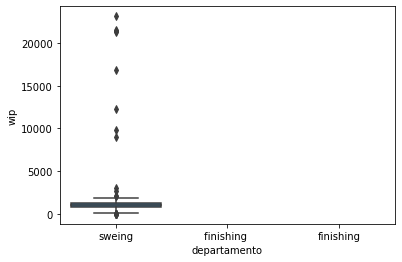

In [4]:
sns.boxplot(x='departamento',y='wip',data=df)

Todos os valores nulos pertencem ao departamento de acabamento. O departamento de acabamento precisa obter um trabalho do departamento de costura. Este resultado pode significar que o departamento de acabamento não tem nenhum trabalho em andamento enquanto aguarda o trabalho do departamento de costura. Portanto, podemos substituir os valores nulos por zero.

In [5]:
df['wip'].fillna(0, inplace=True)

#### Variáveis categóricas 

Algumas variáveis tem um conjunto finito de valores possíveis neste caso é mais vatajoso usar o tipo categorical do pandas, principalmente em datasets grandes para economizar memória.

In [18]:
categorical_cols = ['trimestre', 'departamento', 'dias', 'nº da equipe','n° de mudanças']

for cat_col in categorical_cols:
    print('valores únicos: %s -> %s'% (cat_col, len(df[cat_col].unique())))

valores únicos: trimestre -> 5
valores únicos: departamento -> 3
valores únicos: dias -> 6
valores únicos: nº da equipe -> 12
valores únicos: n° de mudanças -> 3


In [19]:
categorical_cols = ['trimestre', 'departamento', 'dias', 'nº da equipe','n° de mudanças']

for cat_col in categorical_cols:
    df[cat_col] = df[cat_col].astype('category')

#### produtividade atual x produtividade alvo

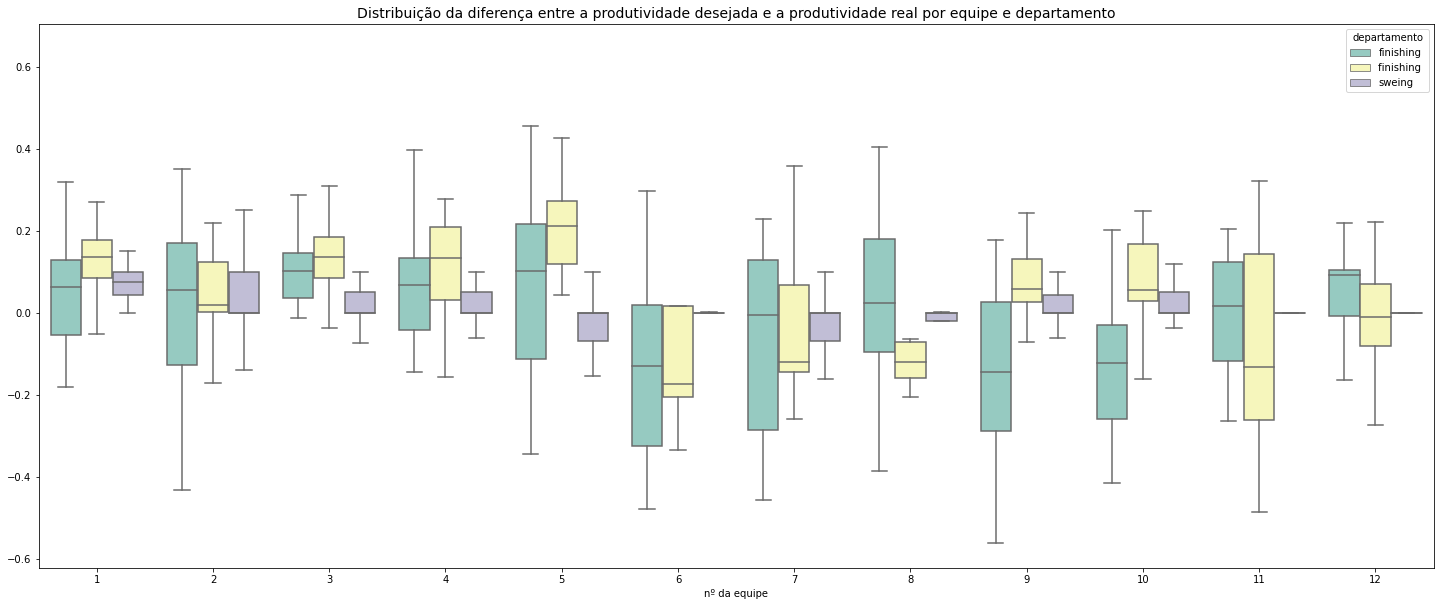

In [27]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'nº da equipe', y = df['produtividade atual']-df['produtividade alvo'], data = df,
     palette = palette,hue='departamento',fliersize = 0)

plt.title('Distribuição da diferença entre a produtividade desejada e a produtividade real por equipe e departamento',fontsize= 14)
plt.show()

Existem variações negativas e positivas da produtividade desejada com base na equipe e no departamento.

#### Matriz de correlação

<AxesSubplot:>

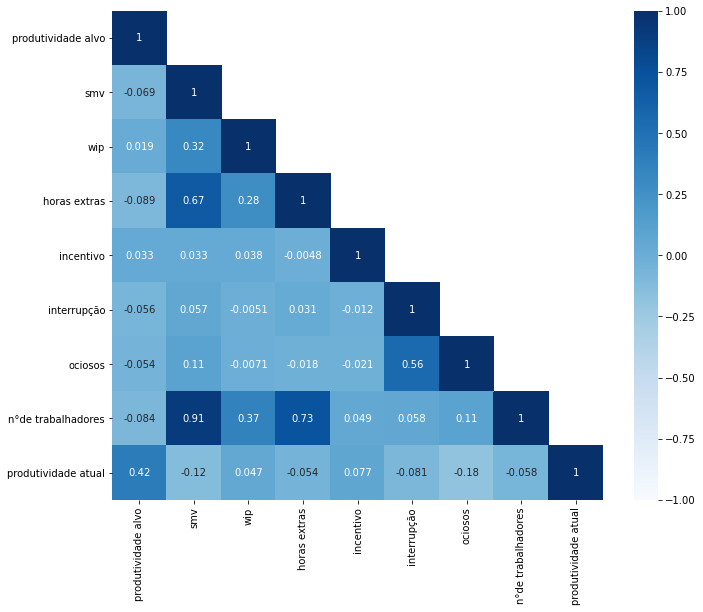

In [22]:
corr_num = df.select_dtypes(include=np.number).corr()
#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Gere uma máscara para o triângulo superior
mask = np.triu(corr_num,1)

sns.heatmap(corr_num, mask=mask, cmap='Blues', annot=True, vmin=-1, vmax=1, center= 0)

Verificando a variação da produtividade e a matriz de correlação identificamos que que podem ser úteis para prever a faixa de produtividade:
* trimestre
* departamento
* dias
* n° da equipe
* n° de mudanças

Antes de construir nosso modelo, precisamos preparar essas colunas para o aprendizado de máquina.

#### Transformando variáveis categóricas em indicadores númericos "dummies"

In [24]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"trimestre")
df = create_dummies(df,"departamento")
df = create_dummies(df,"dias")
df = create_dummies(df,"nº da equipe")

df.columns

Index(['trimestre', 'departamento', 'dias', 'nº da equipe',
       'produtividade alvo', 'smv', 'wip', 'horas extras', 'incentivo',
       'interrupção', 'ociosos', 'n° de mudanças', 'n°de trabalhadores',
       'produtividade atual', 'trimestre_Quarter1', 'trimestre_Quarter2',
       'trimestre_Quarter3', 'trimestre_Quarter4', 'trimestre_Quarter5',
       'departamento_finishing', 'departamento_finishing ',
       'departamento_sweing', 'dias_Monday', 'dias_Saturday', 'dias_Sunday',
       'dias_Thursday', 'dias_Tuesday', 'dias_Wednesday', 'trimestre_Quarter1',
       'trimestre_Quarter2', 'trimestre_Quarter3', 'trimestre_Quarter4',
       'trimestre_Quarter5', 'departamento_finishing',
       'departamento_finishing ', 'departamento_sweing', 'dias_Monday',
       'dias_Saturday', 'dias_Sunday', 'dias_Thursday', 'dias_Tuesday',
       'dias_Wednesday', 'nº da equipe_1', 'nº da equipe_2', 'nº da equipe_3',
       'nº da equipe_4', 'nº da equipe_5', 'nº da equipe_6', 'nº da equipe_7',
 

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["n° de mudanças_enc"] = le.fit_transform(df["n° de mudanças"])
df.head()

,trimestre,departamento,dias,nº da equipe,produtividade alvo,smv,wip,horas extras,incentivo,interrupção,...,nº da equipe_4,nº da equipe_5,nº da equipe_6,nº da equipe_7,nº da equipe_8,nº da equipe_9,nº da equipe_10,nº da equipe_11,nº da equipe_12,n° de mudanças_enc
data,,,,,,,,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,0,0,0,0,1,0,0,0,0,0
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,1,0,0
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,1,0
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,0,0,1,0,0,0,0,0,0,0


#### Criação de etiqueta de destino para produtividade

In [28]:
df['diff'] = df['produtividade atual']-df['produtividade alvo']
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [31]:
df['Target_label']=np.nan
df.loc[df['diff']< 0,'Target_label'] = -1
df.loc[(df['diff']== 0), 'Target_label'] = 0
df.loc[df['diff']> 0, 'Target_label'] = 1
df[['diff','Target_label']].head()

,diff,Target_label
data,,
1/1/2015,0.140725,1.0
1/1/2015,0.136500,1.0
1/1/2015,0.000570,1.0
1/1/2015,0.000570,1.0
1/1/2015,0.000382,1.0


Se a diferença entre a produtividade real e a produtividade almejada for positiva, isso significa que a produtividade está na faixa de superexecução.

Se a diferença entre a produtividade real e a produtividade almejada for igual a 0, significa que a produtividade está na faixa do esperado.

Se a diferença entre a produtividade real e a produtividade desejada for negativa, isso significa que a produtividade está na faixa de desempenho insuficiente.

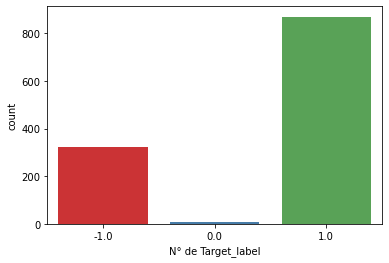

In [32]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('N° de Target_label')

plt.show()

Como pode ser visto no gráfico acima, existe um desequilíbrio, por isso é necessário tratá-lo

In [33]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

A partir das contagens de valores acima, pode-se ver que o conjunto de dados está desequilibrado devido ao grande número de observações desequilibradas. Nesse caso, um problema de classificação binária pode ser modelado para prever se a produtividade está na faixa de superexecutada ou não.

Como parte do nosso pré-processamento, é necessário transformar os 3 rótulos de classe em 2 rótulos:

In [34]:
df['Target_label'] = [-1 if x==-1 else 1 for x in df['Target_label']]

df['Target_label'].value_counts()

 1    875
-1    322
Name: Target_label, dtype: int64

### Balanceamento de dados

Os dados estão desequilibrados o que significa que o número de amostras de uma classe é bem maior que o das demais, oque pode inviesar o modelo e gerar erros de classificação. para resolver isso é necessário aplicar técnicas de reamostragem o que pode ser feito pelo pacote imbalanced-learn.

In [36]:
df1=df.drop(['trimestre', 'departamento', 'dias', 'nº da equipe'],axis=1)

In [37]:
from imblearn.over_sampling import SMOTE
X = df1.loc[:, df1.columns != 'Target_label']
y = df1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)
plt.figure(figsize=(12, 8))
plt.title('Reamostragem depois do SMOTE')

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (/home/manoel/anaconda3/lib/python3.8/site-packages/sklearn/utils/fixes.py)